# Imports
Import all necessary libraries.

In [22]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
from scikeras.wrappers import KerasClassifier

import itertools

# Load Dataset
We use pandas to load in our dataset. Subsequently, we split it into features and labels. We then split our features and labels for training and testing.

In [23]:
# Load in transformed data into dataframe
path = '/Users/maxharsh/Desktop/Coding Projects/MatchNet/data/transformed_matches.csv'
df = pd.read_csv(path)

# Split dataframe into features and labels
y = df.pop('label')
X = df

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(55795, 14) (13949, 14) (55795,) (13949,)


# Logistic Regression Model
Here we try out training and testing a logistic regression model on our data.

In [24]:
# Initialize logistic regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6571080364183812

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.66      0.65      6873
           1       0.66      0.66      0.66      7076

    accuracy                           0.66     13949
   macro avg       0.66      0.66      0.66     13949
weighted avg       0.66      0.66      0.66     13949

Confusion Matrix:
 [[4512 2361]
 [2422 4654]]


# Random Forest
Here we train and test a random forest model on our data.

In [25]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.6343107032762205

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.64      0.63      6873
           1       0.64      0.63      0.64      7076

    accuracy                           0.63     13949
   macro avg       0.63      0.63      0.63     13949
weighted avg       0.63      0.63      0.63     13949

Confusion Matrix:
 [[4390 2483]
 [2618 4458]]


# Shallow Neural Network
We create a neural network with 2 hidden layers using ReLU as the activation function, and an output layer that uses sigmoid. We fit our model to our tennis dataset.

In [26]:
# Create our model
model_1 = Sequential()
model_1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

# Fit model
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step - accuracy: 0.6400 - loss: 0.6273 - val_accuracy: 0.6541 - val_loss: 0.6173
Epoch 2/10
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 2s 953us/step - accuracy: 0.6540 - loss: 0.6183 - val_accuracy: 0.6534 - val_loss: 0.6157
Epoch 3/10
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - accuracy: 0.6528 - loss: 0.6178 - val_accuracy: 0.6539 - val_loss: 0.6155
Epoch 4/10
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6529 - loss: 0.6169 - val_accuracy: 0.6525 - val_loss: 0.6155
Epoch 5/10
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.6567 - loss: 0.6141 - val_accuracy: 0.6557 - val_loss: 0.6141
Epoch 6/10
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.6543 - loss: 0.6143 - val_accuracy: 0.6523 - val_loss: 0.6164
Epoch 7/10
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.6557 - loss: 0.6148 - val_accuracy: 0.6541 - val_loss: 0.6148
Epoch 8/10
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.6534 - l

# Evaluating Shallow Neural Network
We evaluate our model on test data.

In [27]:
# Evaluate model on test data
_, accuracy = model_1.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

# Uses our trained model to generate predicted probabilities for each instance in test set
y_pred = model_1.predict(X_test)
# Converts probabilities into class labels (1 if greater than .5, 0 otherwise)
y_pred = (y_pred > 0.5)

print(classification_report(y_test, y_pred))

436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.6563 - loss: 0.6170
Accuracy: 65.64
436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      6873
           1       0.67      0.64      0.66      7076

    accuracy                           0.66     13949
   macro avg       0.66      0.66      0.66     13949
weighted avg       0.66      0.66      0.66     13949



# Hyperparameter Tuning

In [28]:
# Dictionary of possible hyperparameters to choose from
GRID_SEARCH_PARAMS = {
    'neurons': [32, 64],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64],
    'epochs': [10, 15, 20],
    'optimizer': ['adam', 'sgd'],
}

# Creates a model based on # of neurons, learning rate, and the optimizer
def create_model(neurons, learning_rate, optimizer):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = SGD(learning_rate=learning_rate)

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

best_accuracy = 0
best_params = {}

keys, values = zip(*GRID_SEARCH_PARAMS.items())
combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

print(f"Total combinations: {len(combinations)}")

# Loop through and test the accuracy for each combination
for params in combinations:
    print(f"Testing combination: {params}")

    model = create_model(
        neurons=params['neurons'],
        learning_rate=params['learning_rate'],
        optimizer=params['optimizer']
    )

    model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)

    _, accuracy = model.evaluate(X_test, y_test, verbose=0)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
        print(f"New best accuracy: {best_accuracy:.4f}")

print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best Params: {best_params}")


Total combinations: 72
Testing combination: {'neurons': 32, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


New best accuracy: 0.6559
Testing combination: {'neurons': 32, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 10, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 15, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


New best accuracy: 0.6562
Testing combination: {'neurons': 32, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 15, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


New best accuracy: 0.6576
Testing combination: {'neurons': 32, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 10, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 10, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 15, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 15, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 10, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 15, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 15, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 20, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 20, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 10, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 10, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 15, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 15, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 20, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 20, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.1, 'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.1, 'batch_size': 32, 'epochs': 10, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.1, 'batch_size': 32, 'epochs': 15, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.1, 'batch_size': 32, 'epochs': 15, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.1, 'batch_size': 32, 'epochs': 20, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.1, 'batch_size': 32, 'epochs': 20, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


New best accuracy: 0.6577
Testing combination: {'neurons': 32, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 10, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 10, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 15, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 15, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 20, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 32, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 20, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 10, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 15, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 15, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 10, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 10, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 15, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 15, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 10, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 15, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 15, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 20, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 20, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 10, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 10, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 15, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 15, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 20, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 20, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.1, 'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.1, 'batch_size': 32, 'epochs': 10, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.1, 'batch_size': 32, 'epochs': 15, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.1, 'batch_size': 32, 'epochs': 15, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.1, 'batch_size': 32, 'epochs': 20, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.1, 'batch_size': 32, 'epochs': 20, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 10, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 10, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 15, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 15, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 20, 'optimizer': 'adam'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing combination: {'neurons': 64, 'learning_rate': 0.1, 'batch_size': 64, 'epochs': 20, 'optimizer': 'sgd'}


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Accuracy: 0.6577
Best Params: {'neurons': 32, 'learning_rate': 0.1, 'batch_size': 32, 'epochs': 20, 'optimizer': 'sgd'}


# Optimal Model 
Based off the values obtained during the grid search, now we use those values to create and train a model.

In [29]:
# Now we create and train a model with the optimal parameters
best_model = create_model(
    neurons=best_params['neurons'],
    learning_rate=best_params['learning_rate'],
    optimizer=best_params['optimizer']
)

best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_test, y_test))
     

Epoch 1/20


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1744/1744 ━━━━━━━━━━━━━━━━━━━━ 2s 775us/step - accuracy: 0.6392 - loss: 0.6328 - val_accuracy: 0.6521 - val_loss: 0.6181
Epoch 2/20
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.6472 - loss: 0.6221 - val_accuracy: 0.6556 - val_loss: 0.6158
Epoch 3/20
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.6536 - loss: 0.6167 - val_accuracy: 0.6538 - val_loss: 0.6160
Epoch 4/20
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.6527 - loss: 0.6166 - val_accuracy: 0.6535 - val_loss: 0.6156
Epoch 5/20
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - accuracy: 0.6531 - loss: 0.6154 - val_accuracy: 0.6489 - val_loss: 0.6196
Epoch 6/20
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.6518 - loss: 0.6168 - val_accuracy: 0.6566 - val_loss: 0.6144
Epoch 7/20
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.6534 - loss: 0.6167 - val_accuracy: 0.6524 - val_loss: 0.6149
Epoch 8/20
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.6547 - loss: 0.61

# Test the best Model

In [30]:
# Test the best model
_, accuracy = best_model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)

print(classification_report(y_test, y_pred))

436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.6471 - loss: 0.6197
Accuracy: 64.76
436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
              precision    recall  f1-score   support

           0       0.62      0.71      0.67      6873
           1       0.68      0.58      0.63      7076

    accuracy                           0.65     13949
   macro avg       0.65      0.65      0.65     13949
weighted avg       0.65      0.65      0.65     13949



# Larger and Deeper Neural Network

In [31]:
# Trying a much larger and deeper model
# Define a deeper model
model_deep = Sequential()

# Input layer + first hidden layer
model_deep.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model_deep.add(Dropout(0.3))

# Second hidden layer
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.3))

# Third hidden layer
model_deep.add(Dense(64, activation='relu'))
model_deep.add(Dropout(0.3))

# Fourth hidden layer (optional)
model_deep.add(Dense(32, activation='relu'))

# Output layer
model_deep.add(Dense(1, activation='sigmoid'))

# Compile the model
model_deep.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
history = model_deep.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/100


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1744/1744 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6317 - loss: 0.6381 - val_accuracy: 0.6494 - val_loss: 0.6194
Epoch 2/100
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6504 - loss: 0.6228 - val_accuracy: 0.6535 - val_loss: 0.6254
Epoch 3/100
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6550 - loss: 0.6216 - val_accuracy: 0.6519 - val_loss: 0.6217
Epoch 4/100
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6539 - loss: 0.6197 - val_accuracy: 0.6554 - val_loss: 0.6209
Epoch 5/100
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6542 - loss: 0.6203 - val_accuracy: 0.6532 - val_loss: 0.6160
Epoch 6/100
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6523 - loss: 0.6194 - val_accuracy: 0.6560 - val_loss: 0.6175
Epoch 7/100
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6516 - loss: 0.6198 - val_accuracy: 0.6553 - val_loss: 0.6182
Epoch 8/100
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6546 - loss: 0.6192 - val_

# Plotting Accuracy

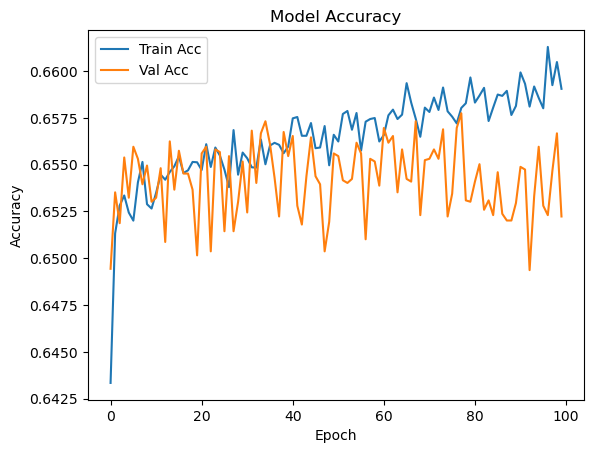

In [32]:
import matplotlib.pyplot as plt

# Plot accuracy for the deep model
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Excluded Feature Dataset
We load in the dataset that excludes several features that were present before. 

In [33]:
# Load in transformed data with excluded into dataframe
path1 = '/Users/maxharsh/Desktop/Coding Projects/MatchNet/data/exclude_features_matches.csv'
exluded_df = pd.read_csv(path1)

# Split dataframe into features and labels
y1 = exluded_df.pop('label')
X1 = exluded_df

# Split into training and testing
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(55795, 7) (13949, 7) (55795,) (13949,)


# Training

In [34]:
# Create our model
model_2 = Sequential()
model_2.add(Dense(64, input_dim=X1_train.shape[1], activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

# Fit model
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.fit(X1_train, y1_train, epochs=10, batch_size=32, validation_data=(X1_test, y1_test))

Epoch 1/10


/opt/anaconda3/envs/matchnet/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1744/1744 ━━━━━━━━━━━━━━━━━━━━ 2s 847us/step - accuracy: 0.6418 - loss: 0.6293 - val_accuracy: 0.6542 - val_loss: 0.6184
Epoch 2/10
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.6484 - loss: 0.6227 - val_accuracy: 0.6526 - val_loss: 0.6183
Epoch 3/10
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - accuracy: 0.6487 - loss: 0.6201 - val_accuracy: 0.6531 - val_loss: 0.6177
Epoch 4/10
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - accuracy: 0.6539 - loss: 0.6181 - val_accuracy: 0.6527 - val_loss: 0.6174
Epoch 5/10
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.6523 - loss: 0.6179 - val_accuracy: 0.6530 - val_loss: 0.6183
Epoch 6/10
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - accuracy: 0.6520 - loss: 0.6196 - val_accuracy: 0.6524 - val_loss: 0.6171
Epoch 7/10
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.6510 - loss: 0.6182 - val_accuracy: 0.6524 - val_loss: 0.6193
Epoch 8/10
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.6509 - loss: 0.61

In [35]:
# Evaluate model on test data
_, accuracy = model_2.evaluate(X1_test, y1_test)
print('Accuracy: %.2f' % (accuracy*100))

# Uses our trained model to generate predicted probabilities for each instance in test set
y_pred = model_2.predict(X1_test)
# Converts probabilities into class labels (1 if greater than .5, 0 otherwise)
y_pred = (y_pred > 0.5)

print(classification_report(y1_test, y_pred))

436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.6506 - loss: 0.6199
Accuracy: 65.17
436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step
              precision    recall  f1-score   support

           0       0.64      0.67      0.66      6873
           1       0.66      0.63      0.65      7076

    accuracy                           0.65     13949
   macro avg       0.65      0.65      0.65     13949
weighted avg       0.65      0.65      0.65     13949



In [36]:

model_2.save('/Users/maxharsh/Desktop/Coding Projects/MatchNet/model/my_model.keras')